In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import skimage
from skimage.data import coins

In [2]:
coins = coins()

In [3]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [4]:
coins.shape

(303, 384)

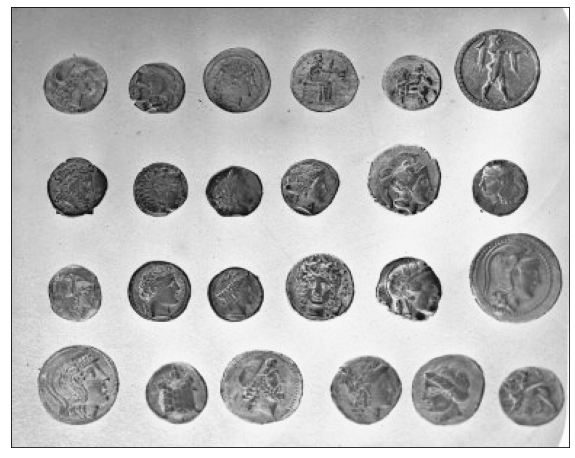

In [5]:
plt.figure(figsize=(10, 10))
plt.imshow(coins, cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale

In [7]:
smoothed_coins = gaussian_filter(coins, sigma=2)

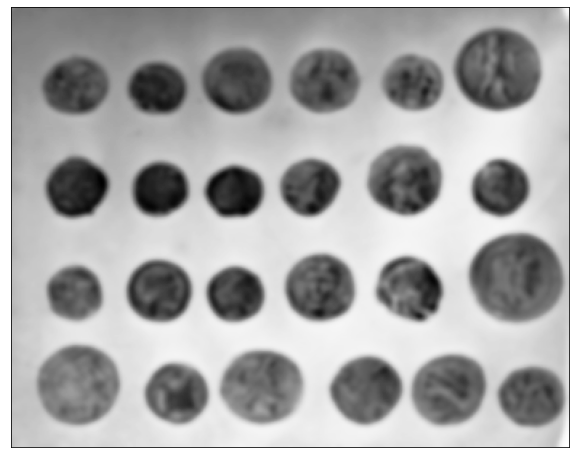

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(smoothed_coins, cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
rescaled_coins = rescale(smoothed_coins, 0.2, mode='reflect', multichannel=False, anti_aliasing=True)

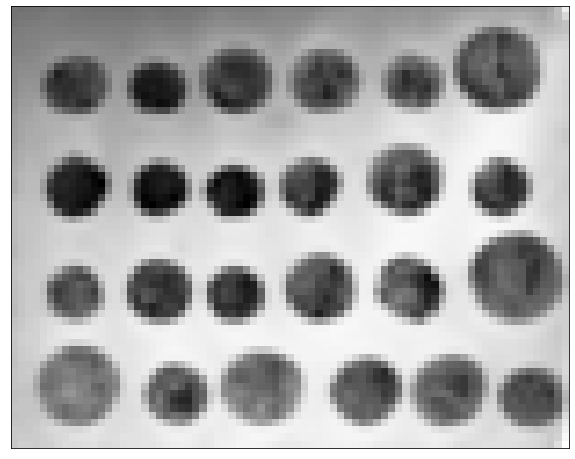

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(rescaled_coins, cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
n_clusters = 10

In [12]:
X = np.reshape(rescaled_coins, (-1, 1))
X.shape

(4697, 1)

In [13]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
ac.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=10)

In [14]:
ac.labels_

array([2, 2, 2, ..., 1, 0, 9], dtype=int64)

In [15]:
labels = np.reshape(ac.labels_, rescaled_coins.shape)
labels.shape

(61, 77)

In [16]:
unique_labels = np.unique(labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

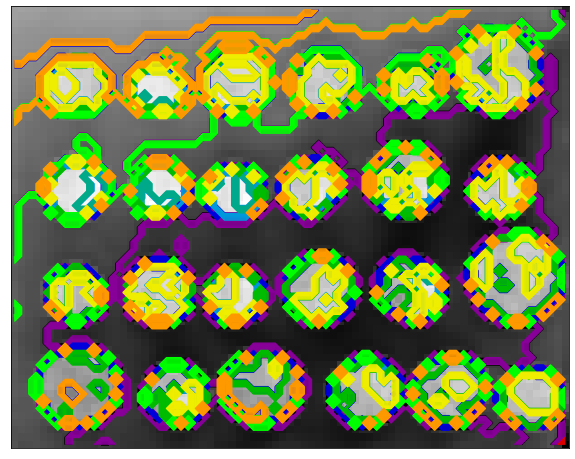

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters))])
plt.xticks([])
plt.yticks([])
plt.show();

In [19]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*rescaled_coins.shape)
connectivity.shape

(4697, 4697)

In [20]:
n_clusters = 27

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
ward.fit(X)

AgglomerativeClustering(connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int32'>'
	with 23209 stored elements in COOrdinate format>,
                        n_clusters=27)

In [21]:
labels = np.reshape(ward.labels_, rescaled_coins.shape)

In [22]:
unique_labels = np.unique(labels)
print(unique_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


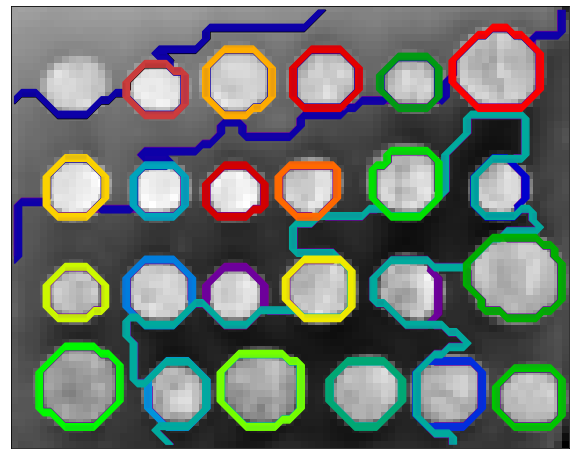

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters))])
plt.xticks([])
plt.yticks([])
plt.show();